# TITANIC: Survival of a Disaster

Long before Artifical Intelligence or Machine Learning was a thing. We were already explorers of endless possibilites. 

All these oppurtunities come with a risk. With the technology of today, would it be possible to predict an outcome of the past?

The Titanic disaster happened over 100 years ago. And a lot of passenger data has been saved. The dataset consists of the following:

* ROW - Row number of datapoint
* PCLASS - Class of ticket (1st, 2nd, 3rd)
* SURVIVED - Did the passenger survive the incident (1, 0)
* NAME - Name of the passenger
* AGE - Age of the passenger
* EMBARKED - Place of embarkment on to the Titanic (city)
* HOME - Home city of passenger
* ROOM - Passenger room number
* TICKET - Ticket number of the passenger
* BOAT - Escape boat for passenger
* SEX - Gender of passenger

Can we produce a model that predicts the survival based on the data, using one-hot-encoding on all categorical data?

## Importing Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn as sk

from sklearn.linear_model import LinearRegression as lr

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', mpl.__version__)

numpy version: 1.20.1
pandas version: 1.2.4
scikit-learn version: 0.24.1
matplotlib version: 3.3.4


In [2]:
column_names = ['ROW', 'PCLASS', 'SURVIVED', 'NAME',
                'AGE', 'EMBARKED', 'HOME', 'ROOM', 'TICKET', 'BOAT', 'SEX']
dataset = pd.read_csv('/Users/matt/Desktop/AI/PersonalNotebooks/Titanic/Titanic.csv',
                     delimiter=',', names=column_names)
dataset = dataset.iloc[1: , :]
dataset.head()

,ROW,PCLASS,SURVIVED,NAME,AGE,EMBARKED,HOME,ROOM,TICKET,BOAT,SEX
1,1,1st,1,"Allen, Miss Elisabeth Walton",29,Southampton,"St Louis, MO",B-5,24160 L221,2,female
2,2,1st,0,"Allison, Miss Helen Loraine",2,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
3,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
4,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
5,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [3]:
print('Shape of the dataset: {}'.format(dataset.shape))

Shape of the dataset: (1313, 11)


## Treating the Dataset

In [4]:
dataset.describe()

,ROW,PCLASS,SURVIVED,NAME,AGE,EMBARKED,HOME,ROOM,TICKET,BOAT,SEX
count,1313,1313,1313,1313,633,821,754,77,69,347,1313
unique,1313,3,2,1310,73,3,371,53,41,99,2
top,1289,3rd,0,"Connolly, Miss Kate",30,Southampton,"New York, NY",F-33,17608 L262 7s 6d,5,male
freq,1,711,864,2,28,573,65,4,5,27,850


The distribution displays that:

1. There are a few features which can be categorized, namely: PCLASS, SURVIVED, EMBARKED and SEX
2. The count of TICKET and ROOM are relatively low.

There are some oddities aswell

1. The top row is 480, yet there are 1313 rows.
2. The name 'Connolly, Miss Kate' appears twice. Also, there are 1313 names, with 1310 unique. This means there is one more double present.

To start out ROW has no importance because it represents the index of the datapoint. 

NAME would have little to no importance in predicting the survival rate. In an extensive analysis this could be viable, but not in this situation. 

In addition to that the ROOM and TICKET features can be dropped because they have a lot of null values, this could have impact on the model. but making an estimation for over 90% of the data is not feasible.

BOAT also has bad descriptions and wouldn't be of great importance in a basic situation.

Tables ROW, NAME, ROOM, BOAT, HOME and TICKET will be dropped.

In [5]:
dataset = dataset.drop(['ROW', 'ROOM', 'TICKET', 'NAME', 'BOAT', 'HOME'], axis=1)
dataset.head()

,PCLASS,SURVIVED,AGE,EMBARKED,SEX
1,1st,1,29,Southampton,female
2,1st,0,2,Southampton,female
3,1st,0,30,Southampton,male
4,1st,0,25,Southampton,female
5,1st,1,0.9167,Southampton,male


As a final basic preperation stage the SURVIVED feature will be moved to the right.

In [6]:
df1 = dataset.pop('SURVIVED')
dataset['SURVIVED'] = df1
dataset.head()

,PCLASS,AGE,EMBARKED,SEX,SURVIVED
1,1st,29,Southampton,female,1
2,1st,2,Southampton,female,0
3,1st,30,Southampton,male,0
4,1st,25,Southampton,female,0
5,1st,0.9167,Southampton,male,1


### Null values

In [7]:
dataset.isnull().sum()

PCLASS        0
AGE         680
EMBARKED    492
SEX           0
SURVIVED      0
dtype: int64

#### Age

In [8]:
age_list = dataset[['AGE']]
print(age_list)

         AGE
1         29
2          2
3         30
4         25
5     0.9167
...      ...
1309     NaN
1310     NaN
1311     NaN
1312     NaN
1313     NaN

[1313 rows x 1 columns]


The data set cotains all kinds of variables. Some of the values are NaN, others are floats. Preferably AGE would be an int. All missing values will be set as the median.

In [9]:
from numpy import nan
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
age_list = age_list.replace(0, nan)
values = age_list.values
imputer = SimpleImputer(missing_values=nan, strategy='mean')
transformed_values = imputer.fit_transform(values)

def convert_int(x):
    return int(x)

int_list = np.vectorize(convert_int)

dataset['AGE'] = int_list(transformed_values)
dataset['AGE']

1       29
2        2
3       30
4       25
5        0
        ..
1309    31
1310    31
1311    31
1312    31
1313    31
Name: AGE, Length: 1313, dtype: int32

#### Embarked

In [10]:
dataset['EMBARKED'].value_counts()

Southampton    573
Cherbourg      203
Queenstown      45
Name: EMBARKED, dtype: int64

From this we can see that Southampton covers over 50% of registered locations of embarkment. The remaining data will be filled using this median.

In [11]:
dataset['EMBARKED'].fillna(method='ffill', inplace=True)
dataset['EMBARKED'].value_counts()

Southampton    1058
Cherbourg       209
Queenstown       46
Name: EMBARKED, dtype: int64

### Categorizing data

#### Class

In [12]:
dataset['PCLASS'] = dataset['PCLASS'].map({'1st': 1, '2nd': 2, '3rd': 3})
dataset.sample(5)

,PCLASS,AGE,EMBARKED,SEX,SURVIVED
1226,3,31,Southampton,male,0
783,3,24,Queenstown,female,1
297,1,31,Southampton,female,1
1017,3,31,Southampton,male,1
790,3,45,Southampton,male,0


#### Sex

In [13]:
dataset['SEX'] = dataset['SEX'].map({'male': 0, 'female': 1})
dataset.sample(5)

,PCLASS,AGE,EMBARKED,SEX,SURVIVED
407,2,38,Southampton,0,0
130,1,48,Cherbourg,0,1
218,1,31,Southampton,0,0
212,1,31,Southampton,0,0
195,1,22,Cherbourg,1,1


#### Embarked

In [14]:
dataset['EMBARKED'] = dataset['EMBARKED'].map({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2})
dataset.sample(5)

,PCLASS,AGE,EMBARKED,SEX,SURVIVED
1172,3,31,0,1,0
363,2,54,0,0,0
913,3,31,0,0,0
1218,3,31,0,0,0
282,1,27,1,0,0


## Machine Learning

For now we have a start at data preparation. Lets try Random Forest Regression to check if we are heading in the right direction.

In [15]:
#X_train = dataset.drop(["SURVIVED"], axis=1)
#Y_train = dataset['SURVIVED']
#X_test = dataset
#X_train.shape, Y_train.shape, X_test.shape

# ??? Using this method actually gives a better accuracy compared to tts ???

#splitting data into training set and test set
from sklearn.model_selection import train_test_split as tts
models = []
score = []
acc = []

X = dataset.drop(["SURVIVED"], axis=1)
Y = dataset['SURVIVED']

X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2)
Y_pred = 0

X_test.head()

#onehot
def one_hot_encode(categorical_variables, dataset):
    dataset_hot = dataset
    for variable in categorical_variables:
        dataset_hot[variable].fillna("Missing", inplace=True)
        discarded = pd.get_dummies(dataset_hot[variable], prefix=variable)
        dataset_hot = pd.concat([dataset_hot,discarded], axis=1)
        dataset_hot.drop([variable], axis=1, inplace=True)
    return dataset_hot

ds_hot = one_hot_encode(['SEX', 'EMBARKED', 'PCLASS'], dataset)
    
X_hot = ds_hot.drop(["SURVIVED"], axis=1)
Y_hot = ds_hot['SURVIVED']

X_train_hot, X_test_hot, Y_train_hot, Y_test_hot = tts(X_hot, Y_hot, test_size=0.2)

#### Dataset without One-Hot-Encoding

In [16]:
X_train.head()

,PCLASS,AGE,EMBARKED,SEX
1296,3,31,0,0
605,3,16,0,0
8,1,39,0,0
1174,3,31,0,0
463,2,23,1,1


#### One-Hot-Encoding

In [17]:
X_train_hot.head()

,AGE,SEX_0,SEX_1,EMBARKED_0,EMBARKED_1,EMBARKED_2,PCLASS_1,PCLASS_2,PCLASS_3
1094,31,0,1,1,0,0,0,0,1
86,31,0,1,1,0,0,1,0,0
1078,31,0,1,1,0,0,0,0,1
560,22,1,0,1,0,0,0,1,0
1304,31,1,0,1,0,0,0,0,1


#### Random Forest Classifier

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestClassifier 

random_forest = RandomForestClassifier(criterion='gini',
                                        n_estimators=700, 
                                       min_samples_split=10, 
                                       min_samples_leaf=1, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1,
                                       n_jobs=-1)

def forest(X_train, Y_train, X_test):
    random_forest.fit(X_train, Y_train)
    Y_pred = random_forest.predict(X_test)
    acc_random_forest = round(random_forest.score(X_train, Y_train), 3)
    acc.append(acc_random_forest)
    Y_compare_randomforrest = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
    print(Y_compare_randomforrest.sample(5))
    return acc_random_forest

print('without one hot encoding:', forest(X_train, Y_train, X_test))
#print('with hot encoding:', forest(X_train_hot, Y_train_hot, X_test_hot))

accuracy_forest_cl = cvs(random_forest, X_train, Y_train, scoring='r2', cv=5)
models.append('ForestClassifier')
score.append(accuracy_forest_cl.mean())

     Actual Predicted
1279      0         0
1061      0         0
372       0         0
194       0         0
1032      0         0
without one hot encoding: 0.858


#### Decision Tree Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

def forest_regressor(X_train, Y_train, X_test):
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    acc_fr = round(rf.score(X_train, Y_train), 3)
    acc.append(acc_fr)
    return acc_fr

print('without one hot encoding:', forest_regressor(X_train, Y_train, X_test))
#print('with hot encoding:', forest_regressor(X_train_hot, Y_train_hot, X_test_hot))

accuracy_forest_rg = cvs(rf, X_train, Y_train, scoring='r2', cv=5)
models.append('ForestRegressor')
score.append(accuracy_forest_cl.mean())

without one hot encoding: 0.568


#### Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

polyRegressor = PolynomialFeatures(degree=3)

def poly(X_train, Y_train, X_test):
    X_train_poly = polyRegressor.fit_transform(X_train)
    X_test_poly = polyRegressor.fit_transform(X_test)
    poly = lr()
    poly.fit(X_train_poly, Y_train)
    Y_pred_poly = poly.predict(X_test_poly)
    acc_poly = round(poly.score(X_train_poly, Y_train), 3)
    acc.append(acc_poly)
    return acc_poly

print('without one hot encoding:', poly(X_train, Y_train, X_test))
#print('with hot encoding:', poly(X_train_hot, Y_train_hot, X_test_hot))

accuracy_poly = cvs(lr(), polyRegressor.fit_transform(X_train), 
                    Y_train, scoring='r2', cv=5)
models.append('Polynomial')
score.append(accuracy_poly.mean())

without one hot encoding: 0.439


#### Linear Regression

In [21]:
def linear(X_train, Y_train, X_test):
    linear = lr()
    linear.fit(X_train, Y_train)
    Y_pred = linear.predict(X_test)
    acc_linear = round(linear.score(X_train, Y_train), 3)
    acc.append(acc_linear)
    return acc_linear

print('without one hot encoding:', linear(X_train, Y_train, X_test))
#print('with hot encoding:', linear(X_train_hot, Y_train_hot, X_test_hot))

accuracy_linear = cvs(lr(), X_train, Y_train, scoring='r2', cv=5)
models.append('Linear')
score.append(accuracy_linear.mean())

without one hot encoding: 0.359


#### Support Vector Regression

In [22]:
from sklearn.svm import SVR
svr = SVR(kernel='poly', gamma='scale')
def support_vector(X_train, Y_train, X_test):
    svr.fit(X_train, Y_train)
    Y_pred = svr.predict(X_test)
    acc_svr = round(svr.score(X_train, Y_train), 3)
    acc.append(acc_svr)
    return acc_svr

print('without one hot encoding:', support_vector(X_train, Y_train, X_test))
#print('with hot encoding:', support_vector(X_train_hot, Y_train_hot, X_test_hot))

accuracy_svr = cvs(svr, X_train, Y_train, scoring='r2', cv=5)
models.append('SupportVector')
score.append(accuracy_svr.mean())

without one hot encoding: 0.176


#### K-Nearest Neighbor Regression

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13)
    
def neighbor(X_train, Y_train, X_test):
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_train, Y_train), 3)
    acc.append(acc_knn)
    return acc_knn

print('without one hot encoding:', neighbor(X_train, Y_train, X_test))
#print('with hot encoding:', neighbor(X_train_hot, Y_train_hot, X_test_hot))

accuracy_knn = cvs(knn, X_train, Y_train, scoring='r2', cv=5)
models.append('KNN')
score.append(accuracy_knn.mean())

without one hot encoding: 0.816


### R2 of machine learning models

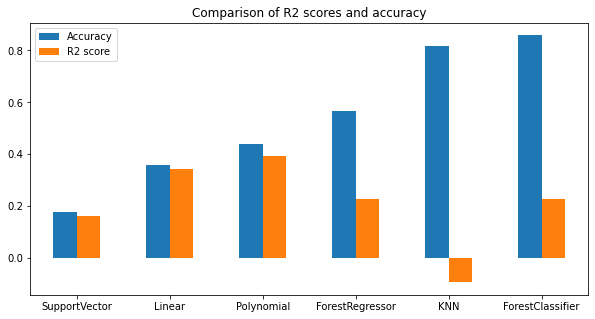

In [24]:
df = pd.DataFrame({'Accuracy': acc,'R2 score': score}, 
                  index=models).sort_values(by='Accuracy', ascending=True)
ax = df.plot.bar(rot=0, figsize=[10,5], title='Comparison of R2 scores and accuracy')

from this result we can see the Polynomial Regression algorithm scores highest. This algorithm will be used for the final conclusion.

### One-Hot-Encoding vs Original

As we can see from the table above the R2 score of the Polynomial algorithm is highest. Yet, the accuracy of the Forest Classifier is highest. In the upcoming section the results of these two algorithms will be compared together with one-hot-encoding.

In [25]:
polynomial_results = []
forestcl_results = []
def test_set(features, dataset):
    ds_hot = one_hot_encode(features, dataset)
    X_hot = ds_hot.drop(["SURVIVED"], axis=1)
    Y_hot = ds_hot['SURVIVED']
    X_train_hot, X_test_hot, Y_train_hot, Y_test_hot = tts(X_hot, Y_hot, test_size=0.2)
    return [X_train_hot, X_test_hot, Y_train_hot, Y_test_hot]

polynomial_sex = test_set(['SEX'], dataset)
polynomial_sex_embark = test_set(['SEX', 'EMBARKED'], dataset)
polynomial_full = test_set(['SEX', 'EMBARKED', 'PCLASS'], dataset)

forest_sex = test_set(['SEX'], dataset)
forest_sex_embark = test_set(['SEX', 'EMBARKED'], dataset)
forest_full = test_set(['SEX', 'EMBARKED', 'PCLASS'], dataset)


forestcl_results.append(forest(forest_sex[0], forest_sex[2], forest_sex[1]))
forestcl_results.append(forest(forest_sex_embark[0], forest_sex_embark[2], forest_sex_embark[1]))
forestcl_results.append(forest(forest_full[0], forest_full[2], forest_full[1]))
forestcl_results.append(acc[5])

polynomial_results.append(acc[2])
polynomial_results.append(poly(polynomial_sex[0], polynomial_sex[2], polynomial_sex[1]))
polynomial_results.append(poly(polynomial_sex_embark[0], polynomial_sex_embark[2], polynomial_sex_embark[1]))
polynomial_results.append(poly(polynomial_full[0], polynomial_full[2], polynomial_full[1]))


results =  forestcl_results + polynomial_results

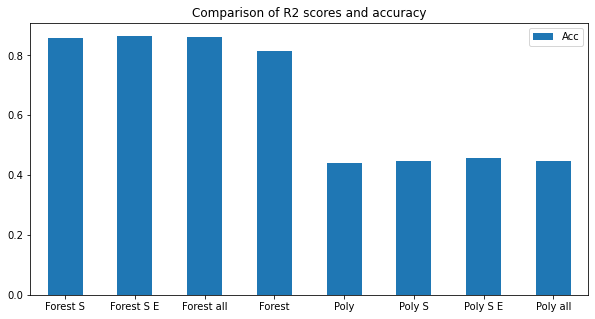

In [26]:
df = pd.DataFrame({'Acc': results}, 
                  index=['Forest S', 'Forest S E', 'Forest all', 'Forest', 'Poly' ,'Poly S', 'Poly S E', 'Poly all'])
ax = df.plot.bar(rot=0, figsize=[10,5], title='Comparison of R2 scores and accuracy')